In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy.io import fits
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import (MinMaxInterval,SqrtStretch,ZScaleInterval,PercentileInterval,ImageNormalize)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch
from itertools import repeat
from matplotlib.colors import LogNorm
import os
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.stats import norm
import pickle
from tools.equivalentWidth import *
import sys
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.interpolate import interp1d
from libradtranpy import libsimulateVisible
import subprocess

libradtranpath= /home/joseph/libRadtran/


# Fine simulations for atm studies

In [2]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 
os.getenv('LIBRADTRANDIR')

'/home/joseph/libRadtran'

In [3]:
AMMIN = 1
AMMAX = 2.3
AMSTEP = 0.1
all_am=np.arange(AMMIN,AMMAX,AMSTEP)
am0=all_am[0]
pressure = 0. # use default value
pwv = -1. # use default value
aer = 0
ozone = -1. # use default value
cloudext = 0
atmStd = 'all'
print(libsimulateVisible.Mod)

rtvis


In [4]:
logFiles=[]
transFiles=[]
atmTypes=[]
#libsimulateVisible.Mod='rtvis' -- by default
paths, thefiles = libsimulateVisible.ProcessSimulationFine(am0, pwv, ozone, pressure, prof_str=atmStd,\
                                                           proc_str='ab', cloudext=cloudext, FLAG_VERBOSE=True)

uvspec cmd:  /home/joseph/libRadtran/bin/uvspec  < simulations/RT/2.0.3/LS/pp/us/ab/rtvis_fine/in/RT_LS_pp_us_ab_rtvis_z10_wv_oz_cld0000.INP > simulations/RT/2.0.3/LS/pp/us/ab/rtvis_fine/out/RT_LS_pp_us_ab_rtvis_z10_wv_oz_cld0000.OUT
uvspec cmd:  /home/joseph/libRadtran/bin/uvspec  < simulations/RT/2.0.3/LS/pp/sw/ab/rtvis_fine/in/RT_LS_pp_sw_ab_rtvis_z10_wv_oz_cld0000.INP > simulations/RT/2.0.3/LS/pp/sw/ab/rtvis_fine/out/RT_LS_pp_sw_ab_rtvis_z10_wv_oz_cld0000.OUT
uvspec cmd:  /home/joseph/libRadtran/bin/uvspec  < simulations/RT/2.0.3/LS/pp/ss/ab/rtvis_fine/in/RT_LS_pp_ss_ab_rtvis_z10_wv_oz_cld0000.INP > simulations/RT/2.0.3/LS/pp/ss/ab/rtvis_fine/out/RT_LS_pp_ss_ab_rtvis_z10_wv_oz_cld0000.OUT
uvspec cmd:  /home/joseph/libRadtran/bin/uvspec  < simulations/RT/2.0.3/LS/pp/mw/ab/rtvis_fine/in/RT_LS_pp_mw_ab_rtvis_z10_wv_oz_cld0000.INP > simulations/RT/2.0.3/LS/pp/mw/ab/rtvis_fine/out/RT_LS_pp_mw_ab_rtvis_z10_wv_oz_cld0000.OUT
uvspec cmd:  /home/joseph/libRadtran/bin/uvspec  < simulations/R

In [5]:
all_trans=[]
d={}
for path, thefile, idx in zip(paths, thefiles, np.arange(len(paths))):
    outfile = os.path.join(path, thefile)
    logfile = outfile+"_verbose.txt"
    logFiles.append(logfile)
    atmType = outfile.split(os.path.sep)[-5]
    print(atmType)
    transFiles.append(outfile)
    data = np.loadtxt(outfile)
    atmTypes.append(atmType)
    wl = data[:,0]
    atm = data[:,1] 
    all_trans.append(atm)
    if idx == 0: d['Wavelength']=wl
    d[atmType]=atm
atmos = pd.DataFrame(data=d)

us
sw
ss
mw
ms
tp


In [6]:
atmos

,Wavelength,us,sw,ss,mw,ms,tp
0,250.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,250.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,250.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,250.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,250.4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
9496,1199.6,0.997714,0.999216,0.996591,0.998619,0.995988,0.994586
9497,1199.7,0.942752,0.980784,0.917581,0.965422,0.902555,0.875077
9498,1199.8,0.994598,0.998000,0.992055,0.996653,0.990537,0.987247
9499,1199.9,0.994598,0.998000,0.992055,0.996653,0.990537,0.987247


In [7]:
bluesMap = plt.get_cmap('Blues')
greysMap = plt.get_cmap('Greys')
greensMap = plt.get_cmap('Greens')
orangesMap = plt.get_cmap('Oranges')
jetMap = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=len(transFiles))
scalBluesMap = cmx.ScalarMappable(norm=cNorm, cmap=bluesMap)
scalGreysMap = cmx.ScalarMappable(norm=cNorm, cmap=greysMap)
scalGreensMap = cmx.ScalarMappable(norm=cNorm, cmap=greensMap)
scalOrangesMap = cmx.ScalarMappable(norm=cNorm, cmap=orangesMap)
scalJetMap = cmx.ScalarMappable(norm=cNorm, cmap=jetMap)
all_blues = scalBluesMap.to_rgba(np.arange(len(transFiles)), alpha=1)
all_greys = scalGreysMap.to_rgba(np.arange(len(transFiles)), alpha=1)
all_greens = scalGreensMap.to_rgba(np.arange(len(transFiles)), alpha=1)
all_oranges = scalOrangesMap.to_rgba(np.arange(len(transFiles)), alpha=1)
all_jets = scalJetMap.to_rgba(np.arange(len(transFiles)), alpha=1)

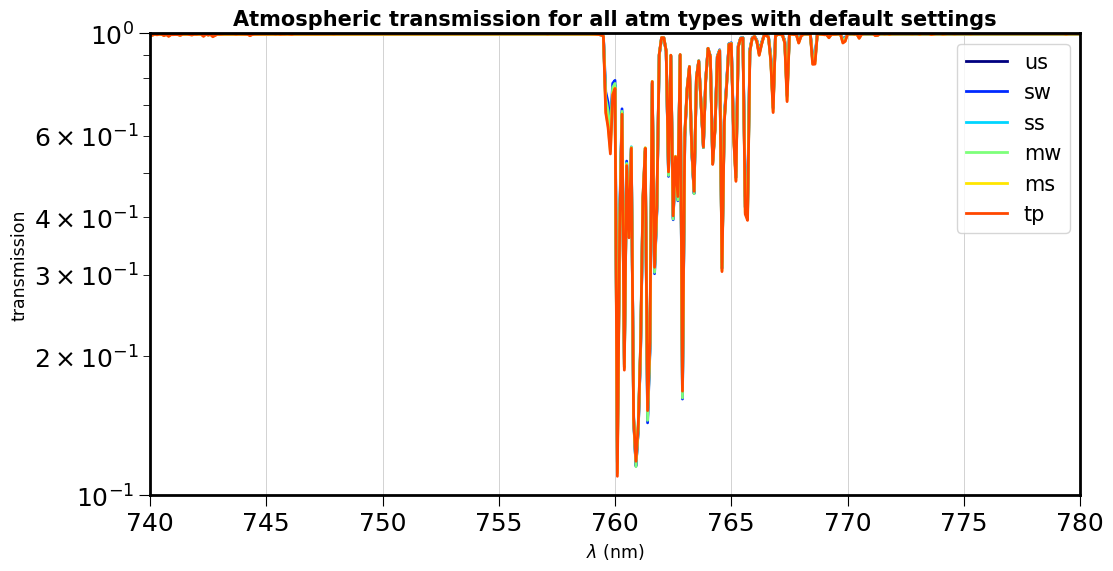

In [8]:
f0, a0 = plt.subplots(1,1)
atmos.plot(x='Wavelength', y=atmTypes, ax=a0, logy=True, color=all_jets)
a0.grid()
a0.set_title("Atmospheric transmission for all atm types with default settings")
a0.set_xlabel("$\\lambda$ (nm)")
a0.set_ylabel("transmission")
a0.set_ylim(0.1,1)
a0.set_xlim(740.,780.)
figname="multitransmission.png"
#plt.savefig(figname)

In [9]:
logFiles_lt=[]
transFiles_lt=[]
atmTypes_lt=[]
#libsimulateVisible.Mod='lt' -- reptran coarse here
paths_lt, thefiles_lt = libsimulateVisible.ProcessSimulation(am0, pwv, ozone, pressure, prof_str=atmStd,\
                                                                 proc_str='ab', cloudext=cloudext, FLAG_VERBOSE=True)

uvspec cmd:  /home/joseph/libRadtran/bin/uvspec  < simulations/RT/2.0.3/LS/pp/us/ab/rtvis/in/RT_LS_pp_us_ab_rtvis_z10_wv_oz_cld0000.INP > simulations/RT/2.0.3/LS/pp/us/ab/rtvis/out/RT_LS_pp_us_ab_rtvis_z10_wv_oz_cld0000.OUT
uvspec cmd:  /home/joseph/libRadtran/bin/uvspec  < simulations/RT/2.0.3/LS/pp/sw/ab/rtvis/in/RT_LS_pp_sw_ab_rtvis_z10_wv_oz_cld0000.INP > simulations/RT/2.0.3/LS/pp/sw/ab/rtvis/out/RT_LS_pp_sw_ab_rtvis_z10_wv_oz_cld0000.OUT
uvspec cmd:  /home/joseph/libRadtran/bin/uvspec  < simulations/RT/2.0.3/LS/pp/ss/ab/rtvis/in/RT_LS_pp_ss_ab_rtvis_z10_wv_oz_cld0000.INP > simulations/RT/2.0.3/LS/pp/ss/ab/rtvis/out/RT_LS_pp_ss_ab_rtvis_z10_wv_oz_cld0000.OUT
uvspec cmd:  /home/joseph/libRadtran/bin/uvspec  < simulations/RT/2.0.3/LS/pp/mw/ab/rtvis/in/RT_LS_pp_mw_ab_rtvis_z10_wv_oz_cld0000.INP > simulations/RT/2.0.3/LS/pp/mw/ab/rtvis/out/RT_LS_pp_mw_ab_rtvis_z10_wv_oz_cld0000.OUT
uvspec cmd:  /home/joseph/libRadtran/bin/uvspec  < simulations/RT/2.0.3/LS/pp/ms/ab/rtvis/in/RT_LS_pp_ms

In [10]:
all_trans_lt=[]
d_lt={}
for path, thefile, idx in zip(paths_lt, thefiles_lt, np.arange(len(paths_lt))):
    outfile = os.path.join(path, thefile)
    logfile = outfile+"_verbose.txt"
    logFiles_lt.append(logfile)
    atmType = outfile.split(os.path.sep)[-5]
    print(atmType)
    transFiles_lt.append(outfile)
    data = np.loadtxt(outfile)
    atmTypes_lt.append(atmType)
    wl = data[:,0]
    atm = data[:,1] 
    all_trans_lt.append(atm)
    if idx == 0: d_lt['Wavelength']=wl
    d_lt[atmType]=atm
atmos_lt = pd.DataFrame(data=d_lt)

us
sw
ss
mw
ms
tp


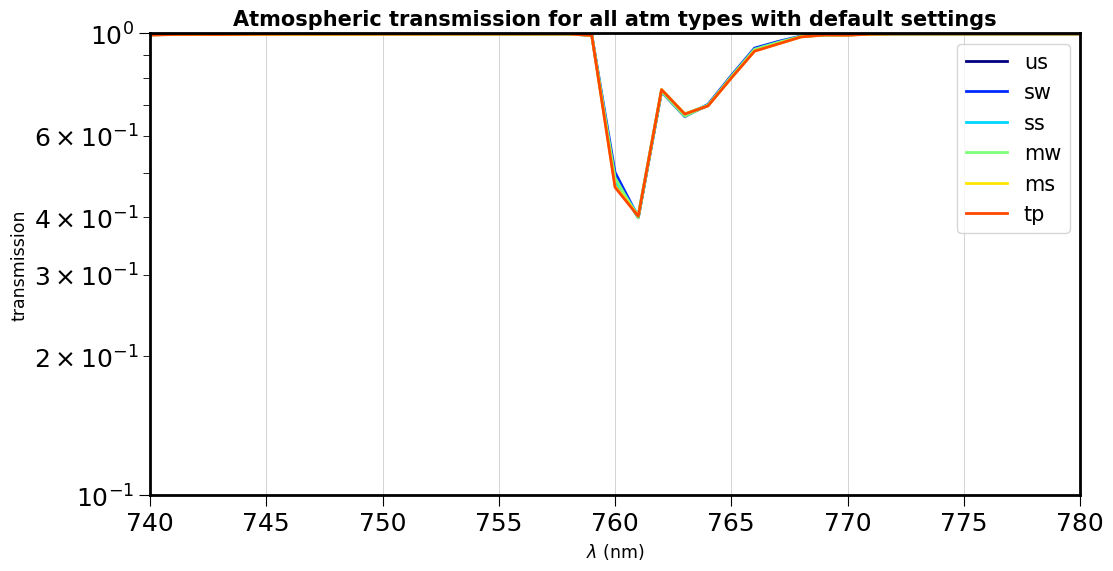

In [11]:
bluesMap = plt.get_cmap('Blues')
greysMap = plt.get_cmap('Greys')
greensMap = plt.get_cmap('Greens')
orangesMap = plt.get_cmap('Oranges')
jetMap = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=len(transFiles_lt))
scalBluesMap = cmx.ScalarMappable(norm=cNorm, cmap=bluesMap)
scalGreysMap = cmx.ScalarMappable(norm=cNorm, cmap=greysMap)
scalGreensMap = cmx.ScalarMappable(norm=cNorm, cmap=greensMap)
scalOrangesMap = cmx.ScalarMappable(norm=cNorm, cmap=orangesMap)
scalJetMap = cmx.ScalarMappable(norm=cNorm, cmap=jetMap)
all_blues = scalBluesMap.to_rgba(np.arange(len(transFiles_lt)), alpha=1)
all_greys = scalGreysMap.to_rgba(np.arange(len(transFiles_lt)), alpha=1)
all_greens = scalGreensMap.to_rgba(np.arange(len(transFiles_lt)), alpha=1)
all_oranges = scalOrangesMap.to_rgba(np.arange(len(transFiles_lt)), alpha=1)
all_jets = scalJetMap.to_rgba(np.arange(len(transFiles_lt)), alpha=1)

f1, a1 = plt.subplots(1,1)
atmos_lt.plot(x='Wavelength', y=atmTypes_lt, ax=a1, logy=True, color=all_jets)
a1.grid()
a1.set_title("Atmospheric transmission for all atm types with default settings")
a1.set_xlabel("$\\lambda$ (nm)")
a1.set_ylabel("transmission")
a1.set_ylim(0.1,1)
a1.set_xlim(740.,780.)
figname="multitransmission.png"
#plt.savefig(figname)

# Study the atmospheres

In [12]:
sel=(atmos["Wavelength"]>=740.)*(atmos["Wavelength"]<=780.)
totalAbs = np.trapz(atmos["us"][sel], atmos["Wavelength"][sel])

In [13]:
sel_lt=(atmos_lt["Wavelength"]>=740.)*(atmos_lt["Wavelength"]<=780.)
totalAbs_lt = np.trapz(atmos_lt["us"][sel_lt], atmos_lt["Wavelength"][sel_lt])

In [14]:
print("Intégrales - reptran fin: {:.4f} ; reptran grossier : {:.4f} ; écart: {:.3f}%".format(totalAbs, totalAbs_lt, 100.*(totalAbs_lt-totalAbs)/totalAbs))

Intégrales - reptran fin: 37.2929 ; reptran grossier : 37.5425 ; écart: 0.669%


In [15]:
sel=(atmos["Wavelength"]>=850.)*(atmos["Wavelength"]<=1000.)
totalAbs = np.trapz(atmos["us"][sel], atmos["Wavelength"][sel])
sel_lt=(atmos_lt["Wavelength"]>=850.)*(atmos_lt["Wavelength"]<=1000.)
totalAbs_lt = np.trapz(atmos_lt["us"][sel_lt], atmos_lt["Wavelength"][sel_lt])
print("Intégrales - reptran fin: {:.4f} ; reptran grossier : {:.4f} ; écart: {:.3f}%".format(totalAbs, totalAbs_lt, 100.*(totalAbs_lt-totalAbs)/totalAbs))

Intégrales - reptran fin: 138.8608 ; reptran grossier : 139.8463 ; écart: 0.710%


It it clear that the total (integrated over the band width) absorption does not significantly depend of the atmosphere simulation method selected, even though the shape of the said band does. Thus, for current applications, lowtran or coarse reptran suffice.

In [16]:
#O2
sel_o2=(atmos["Wavelength"]>=740.)*(atmos["Wavelength"]<=780.)
totalAbs_o2 = np.empty_like([])
for atm in atmTypes:
    totalAbs_o2 = np.append(totalAbs_o2, np.trapz(atmos[atm][sel_o2], atmos["Wavelength"][sel_o2]))
ref=totalAbs_o2[0]
totalAbs_o2 = 100.*(totalAbs_o2 - ref)/ref
print(\
      "O2-band integrated absorption difference vs. ref atmosphere ("+atmTypes[0]+") -"+\
      "\n\tus: {:.3f} %,\
      \n\tsw: {:.3f} %,\
      \n\tss: {:.3f} %,\
      \n\tmw: {:.3f} %,\
      \n\tms: {:.3f} %,\
      \n\ttp: {:.3f} %.\
      ".format(*totalAbs_o2))

#H2O
sel_h2o=(atmos["Wavelength"]>=850.)*(atmos["Wavelength"]<=1000.)
totalAbs_h2o = np.empty_like([])
for atm in atmTypes_lt:
    totalAbs_h2o = np.append(totalAbs_h2o, np.trapz(atmos[atm][sel_h2o], atmos["Wavelength"][sel_h2o]))
ref=totalAbs_h2o[0]
totalAbs_h2o = 100.*(totalAbs_h2o - ref)/ref
print(\
      "H2O-band integrated absorption difference vs. ref atmosphere ("+atmTypes[0]+") -"+\
      "\n\tus: {:.3f} %,\
      \n\tsw: {:.3f} %,\
      \n\tss: {:.3f} %,\
      \n\tmw: {:.3f} %,\
      \n\tms: {:.3f} %,\
      \n\ttp: {:.3f} %.\
      ".format(*totalAbs_h2o))

O2-band integrated absorption difference vs. ref atmosphere (us) -
	us: 0.000 %,      
	sw: 0.126 %,      
	ss: 0.014 %,      
	mw: 0.023 %,      
	ms: -0.058 %,      
	tp: -0.062 %.      
H2O-band integrated absorption difference vs. ref atmosphere (us) -
	us: 0.000 %,      
	sw: 4.152 %,      
	ss: -2.191 %,      
	mw: 2.271 %,      
	ms: -3.301 %,      
	tp: -5.377 %.      


It is visible that the choice of atmosphere does not significantly impact the absorption due to O2 while it does impact that due to H2O. This confirms the results of the study with equivalent widths.

In [17]:
#atmos_pd_lt=read_atm(logFiles_lt[0], start_line=2622, end_line=2669)
#atmos_pd_lt
atmos_pd=read_atm(logFiles[0], start_line=23292, end_line=23339)
atmos_pd

,Number,Altitude,Pressure,Temperature,Air density,Ozone density,Dioxygene density,Water vapor density,Carbon dioxyde density,Azote dioxyde density,Oxozone density
0,0.0,120.00,0.00003,360.00,5.110260e+11,2.557000e+02,3.707650e+10,1.022800e+05,1.789900e+07,7.722140e+01,1.374670e-25
1,1.0,115.00,0.00004,300.00,9.681330e+11,4.844000e+03,9.106720e+10,2.325120e+05,3.875200e+07,1.501640e+02,8.293240e-25
2,2.0,110.00,0.00007,240.00,2.142690e+12,1.072000e+05,2.572800e+11,6.003200e+05,1.286400e+08,3.408960e+02,6.619300e-24
3,3.0,105.00,0.00014,208.80,5.029780e+12,1.006600e+06,7.046200e+11,1.711220e+06,5.536300e+08,8.254120e+02,4.964890e-23
4,4.0,100.00,0.00032,195.10,1.187970e+13,4.756000e+06,1.902400e+12,4.756000e+06,2.318550e+09,2.021300e+03,3.619130e-22
5,5.0,95.00,0.00076,188.40,2.921760e+13,2.046800e+07,5.263200e+12,1.578960e+07,7.894800e+09,5.146240e+03,2.770130e-21
6,6.0,90.00,0.00184,186.90,7.130510e+13,4.995200e+07,1.355840e+13,6.065600e+07,2.212160e+10,1.305890e+04,1.838300e-20
7,7.0,85.00,0.00446,188.90,1.710070e+14,8.555000e+07,3.422000e+13,2.275630e+08,5.475200e+10,3.285120e+04,1.171010e-19
8,8.0,80.00,0.01050,198.60,3.829320e+14,1.149600e+08,8.008880e+13,7.855600e+08,1.256900e+11,7.740640e+04,6.414210e-19
9,9.0,75.00,0.02400,208.40,8.341140e+14,2.086750e+08,1.744520e+14,2.358030e+09,2.754510e+11,1.794600e+05,3.043360e-18


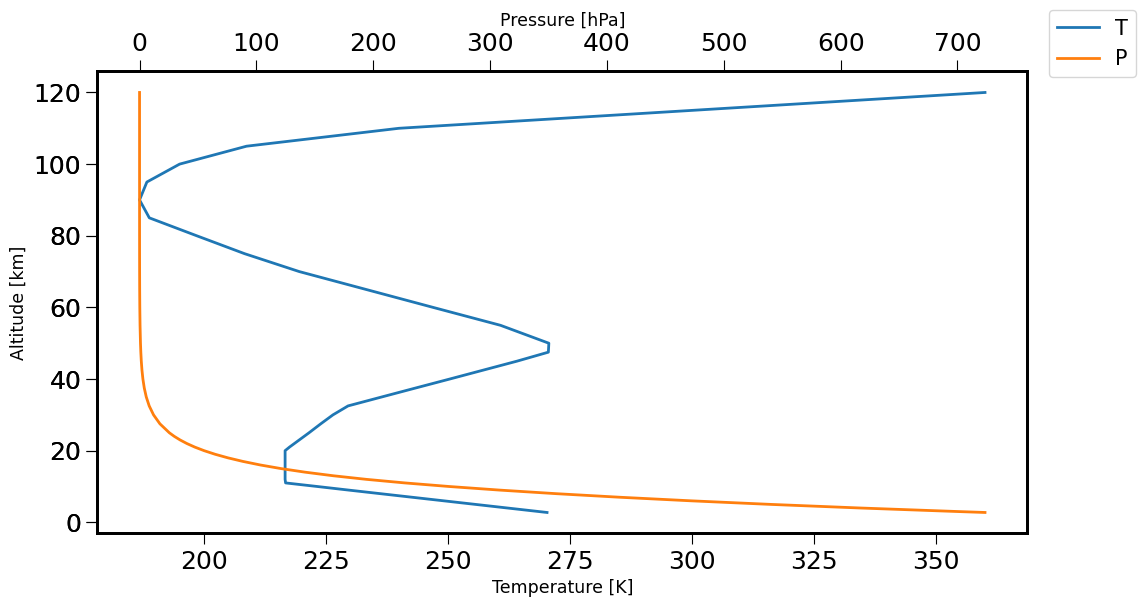

In [18]:
fig, ax = plt.subplots(1,1)
atmos_pd.plot(x='Temperature', y='Altitude', label="T", ax=ax,\
              xlabel='Temperature [K]', ylabel='Altitude [km]', color="tab:blue", legend=False)
ax1=ax.twiny()
atmos_pd.plot(x='Pressure', y='Altitude', label='P', ax=ax1,\
              xlabel='Pressure [hPa]', color="tab:orange", legend=False)
fig.legend()

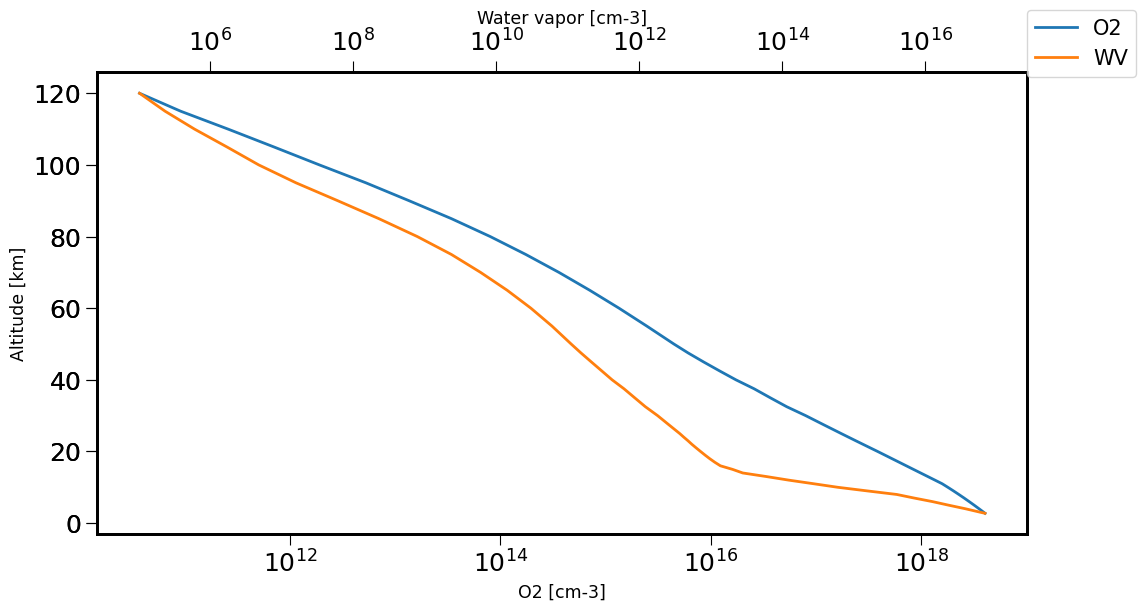

In [19]:
fig, ax = plt.subplots(1,1)
atmos_pd.plot(x='Dioxygene density', y='Altitude', logx=True, label="O2", ax=ax,\
              xlabel='O2 [cm-3]', ylabel='Altitude [km]', color="tab:blue", legend=False)
ax1=ax.twiny()
atmos_pd.plot(x='Water vapor density', y='Altitude', logx=True, label='WV',ax=ax1,\
              xlabel='Water vapor [cm-3]', color="tab:orange", legend=False)
fig.legend()

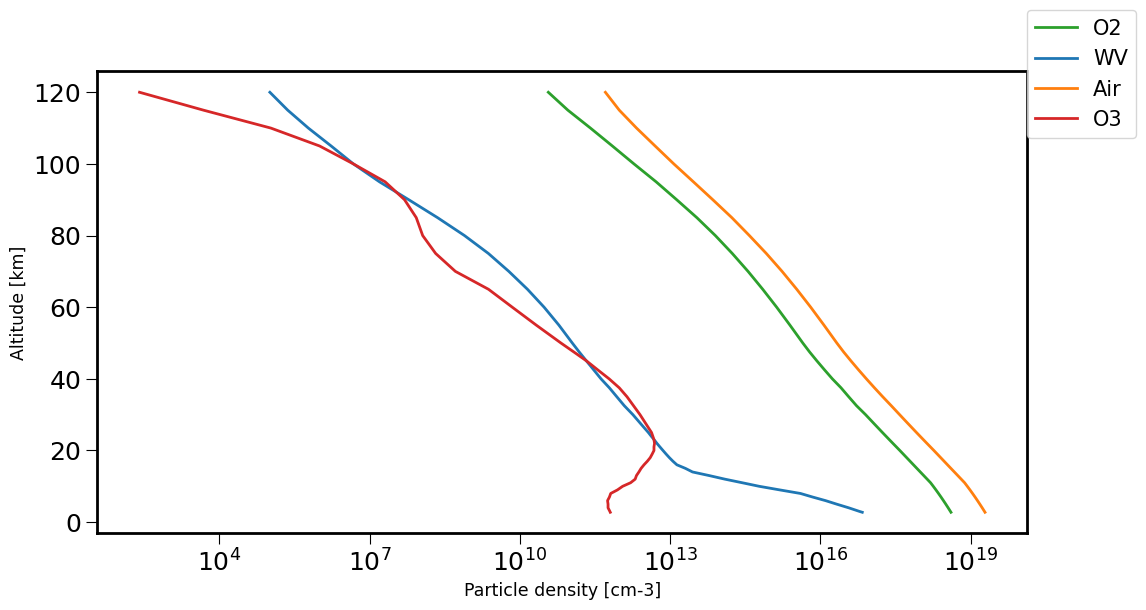

In [20]:
fig, ax = plt.subplots(1,1)
atmos_pd.plot(x='Dioxygene density', y='Altitude', logx=True, label="O2", ax=ax,\
              xlabel='Particle density [cm-3]', ylabel='Altitude [km]', color="tab:green", legend=False)
atmos_pd.plot(x='Water vapor density', y='Altitude', logx=True, label='WV',ax=ax,\
              xlabel='Particle density [cm-3]', color="tab:blue", legend=False)
atmos_pd.plot(x='Air density', y='Altitude', logx=True, label='Air',ax=ax,\
              xlabel='Particle density [cm-3]', color="tab:orange", legend=False)
atmos_pd.plot(x='Ozone density', y='Altitude', logx=True, label='O3',ax=ax,\
              xlabel='Particle density [cm-3]', color="tab:red", legend=False)
fig.legend()

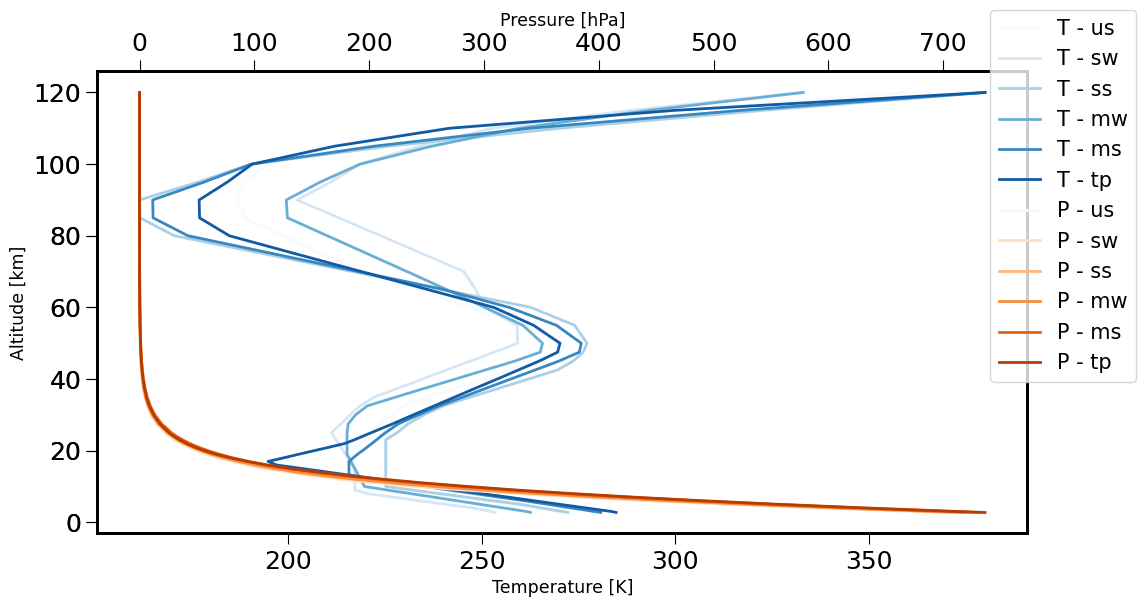

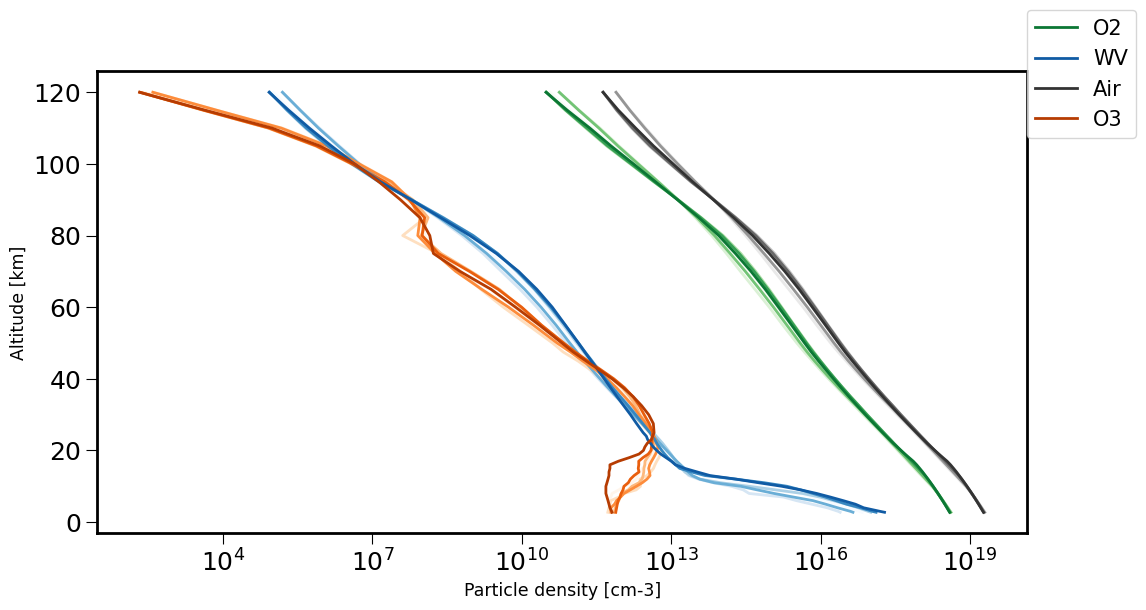

In [21]:
f1, a1 = plt.subplots(1,1)
a11=a1.twiny()
f2, a2 = plt.subplots(1,1)

for log, atm, idx in zip(logFiles, atmTypes, np.arange(len(atmTypes))):
    atmos_pd=read_atm(log, start_line=23292, end_line=23339)
    
    atmos_pd.plot(x='Temperature', y='Altitude', label="T - "+atm, ax=a1,\
                  xlabel='Temperature [K]', ylabel='Altitude [km]', color=all_blues[idx], legend=False)
    atmos_pd.plot(x='Pressure', y='Altitude', label='P - '+atm, ax=a11,\
                  xlabel='Pressure [hPa]', color=all_oranges[idx], legend=False)
    
    if idx==len(atmTypes)-1:
        atmos_pd.plot(x='Dioxygene density', y='Altitude', logx=True, label="O2", ax=a2,\
                      xlabel='Particle density [cm-3]', ylabel='Altitude [km]', color=all_greens[idx], legend=False)
        atmos_pd.plot(x='Water vapor density', y='Altitude', logx=True, label='WV',ax=a2,\
                      xlabel='Particle density [cm-3]', color=all_blues[idx], legend=False)
        atmos_pd.plot(x='Air density', y='Altitude', logx=True, label='Air',ax=a2,\
                      xlabel='Particle density [cm-3]', color=all_greys[idx], legend=False)
        atmos_pd.plot(x='Ozone density', y='Altitude', logx=True, label='O3',ax=a2,\
                      xlabel='Particle density [cm-3]', color=all_oranges[idx], legend=False)
    else:
        atmos_pd.plot(x='Dioxygene density', y='Altitude', logx=True, label='', ax=a2,\
                      xlabel='Particle density [cm-3]', ylabel='Altitude [km]', color=all_greens[idx], legend=False)
        atmos_pd.plot(x='Water vapor density', y='Altitude', logx=True, label='',ax=a2,\
                      xlabel='Particle density [cm-3]', color=all_blues[idx], legend=False)
        atmos_pd.plot(x='Air density', y='Altitude', logx=True, label='',ax=a2,\
                      xlabel='Particle density [cm-3]', color=all_greys[idx], legend=False)
        atmos_pd.plot(x='Ozone density', y='Altitude', logx=True, label='',ax=a2,\
                      xlabel='Particle density [cm-3]', color=all_oranges[idx], legend=False)
f1.legend()
f2.legend()

The parameters that change most in function of the selected model are Ozone and Water Vapor. These are also customizable at simulation level, thus allowing equivalently to tune the model by fitting the correct std atmosphere or the correct set of parameters to any (e.g. us) atmosphere. The second method seems to allow for finer tuning as well.